In [1]:
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import math
from statistics import median
import pandas as pd
import glob
import os
import nest_asyncio
# import gspread
nest_asyncio.apply()
from tardis_dev import datasets
from scipy.optimize import curve_fit

In [2]:
"""
{'ADA_USD': [947, 951], 'MATIC_USD': [138, 273], 'LINK_USD': [14, 50], 'DOGE_USD': [1472, 2596], 'SHIB_USD': [7575757, 28571428], 'XLM_USD': [786, 1770], 'MANA_USD': [75, 212], 'DOT_USD': [18, 28], 'SOL_USD': [8, 16], 'LTC_USD': [1, 3], 'USDT_USD': [11764, 8695]}
"""

"\n{'ADA_USD': [947, 951], 'MATIC_USD': [138, 273], 'LINK_USD': [14, 50], 'DOGE_USD': [1472, 2596], 'SHIB_USD': [7575757, 28571428], 'XLM_USD': [786, 1770], 'MANA_USD': [75, 212], 'DOT_USD': [18, 28], 'SOL_USD': [8, 16], 'LTC_USD': [1, 3], 'USDT_USD': [11764, 8695]}\n"

In [3]:
def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier

In [4]:
datasets.download(
exchange="coinbase",
data_types=[
    "quotes"],
from_date = '2022-11-09',
to_date = '2022-11-10',
symbols = ["LINK-USD"],
download_dir = r"C:\Users\Temp_Student_001\Desktop\research\0.projects\Ariyan\Dataset Coinbase\LINKUSD",
api_key= "TD.CTo-GFKD9yJojKmk.0fsYIehJ-wDD1e-.FVe4814H5x7BkM7.uRoxlXUJQmcdRPz.HWyzjjLu4LiqBi4.sF6W",
)

datasets.download(
exchange="coinbase",
data_types=[
    "trades"],
from_date = '2022-11-09',
to_date = '2022-11-10',
symbols = ["LINK-USD"],
download_dir = r"C:\Users\Temp_Student_001\Desktop\research\0.projects\Ariyan\Dataset Coinbase\LINKUSD",
api_key= "TD.CTo-GFKD9yJojKmk.0fsYIehJ-wDD1e-.FVe4814H5x7BkM7.uRoxlXUJQmcdRPz.HWyzjjLu4LiqBi4.sF6W",
)

In [5]:
datasets.download(
exchange="coinbase",
data_types=[
    "book_snapshot_25"],
from_date = '2022-11-09',
to_date = '2022-11-10',
symbols = ["LINK-USD"],
download_dir = r"C:\Users\Temp_Student_001\Desktop\research\0.projects\Ariyan\Dataset Coinbase\LINKUSD",
api_key= "TD.CTo-GFKD9yJojKmk.0fsYIehJ-wDD1e-.FVe4814H5x7BkM7.uRoxlXUJQmcdRPz.HWyzjjLu4LiqBi4.sF6W",
)

In [6]:
quote_database = glob.glob(os.path.join(r"C:\Users\Temp_Student_001\Desktop\research\0.projects\Ariyan\Dataset Coinbase\LINKUSD", "coinbase_quotes*" + "2022-11-09_LINK-USD.csv.gz"))
df_quotes = pd.concat((pd.read_csv(f) for f in quote_database), ignore_index=True)
df_quotes['timestamp'] = pd.to_datetime(df_quotes.timestamp * 1000)
df_quotes['midprice'] = (df_quotes['ask_price'] + df_quotes['bid_price'])/2

orderbook_database =  glob.glob(os.path.join(r"C:\Users\Temp_Student_001\Desktop\research\0.projects\Ariyan\Dataset Coinbase\LINKUSD", "coinbase_book_snapshot_25*" + "2022-11-09_LINK-USD.csv.gz"))
df_orderbook = pd.concat((pd.read_csv(f) for f in orderbook_database), ignore_index=True)
df_orderbook['timestamp'] = pd.to_datetime(df_orderbook.timestamp * 1000)

trade_database = glob.glob(os.path.join(r"C:\Users\Temp_Student_001\Desktop\research\0.projects\Ariyan\Dataset Coinbase\LINKUSD", "coinbase_trades*" + "2022-11-09_LINK-USD.csv.gz"))
df_trades = pd.concat((pd.read_csv(f) for f in trade_database), ignore_index=True)
df_trades['timestamp'] = pd.to_datetime(df_trades.timestamp * 1000)
df_trades = df_trades[df_trades['timestamp'] >= df_quotes.loc[0, 'timestamp']]
df_trades.index = range(len(df_trades))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Temp_Student_001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_19576\2420849401.py", line 7, in <module>
    df_orderbook = pd.concat((pd.read_csv(f) for f in orderbook_database), ignore_index=True)
  File "C:\Users\Temp_Student_001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\util\_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Temp_Student_001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\reshape\concat.py", line 368, in concat
    op = _Concatenator(
  File "C:\Users\Temp

In [5]:
df_quotes['spread'] = df_quotes.ask_price - df_quotes.bid_price
df_quotes

,exchange,symbol,timestamp,local_timestamp,ask_amount,ask_price,bid_price,bid_amount,midprice,spread
0,coinbase,LINK-USD,2022-11-09 00:00:00.249468,1667952000249468,132.45,7.716,7.713,14.90,7.7145,0.003
1,coinbase,LINK-USD,2022-11-09 00:00:00.274868,1667952000323818,132.45,7.716,7.713,35.92,7.7145,0.003
2,coinbase,LINK-USD,2022-11-09 00:00:00.302321,1667952000350972,132.45,7.716,7.713,14.90,7.7145,0.003
3,coinbase,LINK-USD,2022-11-09 00:00:00.325731,1667952000380516,132.45,7.715,7.713,14.90,7.7140,0.002
4,coinbase,LINK-USD,2022-11-09 00:00:00.335119,1667952000383986,132.45,7.715,7.713,3.67,7.7140,0.002
...,...,...,...,...,...,...,...,...,...,...
2216671,coinbase,LINK-USD,2022-11-09 23:59:59.407735,1668038399452374,291.59,6.218,6.212,11.89,6.2150,0.006
2216672,coinbase,LINK-USD,2022-11-09 23:59:59.446226,1668038399496575,37.77,6.219,6.212,11.89,6.2155,0.007
2216673,coinbase,LINK-USD,2022-11-09 23:59:59.462201,1668038399510511,187.77,6.219,6.212,11.89,6.2155,0.007
2216674,coinbase,LINK-USD,2022-11-09 23:59:59.857617,1668038399902164,37.77,6.219,6.212,11.89,6.2155,0.007


In [6]:
df_trades = df_trades[0:1000]
df_trades.index = range(len(df_trades))

In [7]:
df_trades

,exchange,symbol,timestamp,local_timestamp,id,side,price,amount
0,coinbase,LINK-USD,2022-11-09 00:00:00.498828,1667952000554044,58513612,sell,7.711,9.17
1,coinbase,LINK-USD,2022-11-09 00:00:04.210373,1667952004273103,58513613,sell,7.710,400.00
2,coinbase,LINK-USD,2022-11-09 00:00:05.830128,1667952005881765,58513614,buy,7.702,0.56
3,coinbase,LINK-USD,2022-11-09 00:00:06.471855,1667952006521082,58513615,buy,7.702,3.00
4,coinbase,LINK-USD,2022-11-09 00:00:10.090225,1667952010145370,58513616,sell,7.699,3.67
...,...,...,...,...,...,...,...,...
995,coinbase,LINK-USD,2022-11-09 00:09:48.109775,1667952588157802,58514607,buy,7.551,14.01
996,coinbase,LINK-USD,2022-11-09 00:09:48.461706,1667952588514548,58514608,buy,7.551,0.84
997,coinbase,LINK-USD,2022-11-09 00:09:48.830365,1667952588878929,58514609,buy,7.551,131.22
998,coinbase,LINK-USD,2022-11-09 00:09:49.131674,1667952589180399,58514610,buy,7.552,183.41


In [1]:
max_spread, min_spread = max(df_quotes.spread), min(df_quotes.spread)
gamma = 1
max_kappa, min_kappa = gamma / (np.exp(gamma * min_spread * 0.5) - 1), gamma / (np.exp(gamma * max_spread * 0.5) - 1)
print('Max spread: {},\ngamma: {},\nmax_kappa: {}.'.format(max_spread, gamma, max_kappa))
print('Min spread: {},\nmin_kappa: {}.'.format(min_spread, min_kappa))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Temp_Student_001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_28012\949562811.py", line 1, in <module>
    max_spread, min_spread = max(df_quotes.spread), min(df_quotes.spread)
NameError: name 'df_quotes' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Temp_Student_001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2052, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Temp_Student_001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz

In [10]:
def curve_fit_manual(x, y, alpha, kappa):
    def residuals(params):
        a = params[0]
        b = params[1]
        
        sum = 0
        for i in range(len(x)):
            sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
        return sum
    
    learning_rate = 0.01
    precision = 0.001
    
    a = alpha
    b = kappa
    da = 1
    db = 1
    
    time_start = datetime.datetime.now()
    
    while abs(da) > precision or abs(db) > precision:
        da = (residuals([a + precision, b]) - residuals([a, b])) / precision
        db = (residuals([a, b + precision]) - residuals([a, b])) / precision
        
        a -= learning_rate * da
        b -= learning_rate * db
        
        now = datetime.datetime.now()
        
        if (now - time_start).seconds > 1: 
            a = 0 
            b = 0
            
            break
            
        
    if a < 0: 
        a = 0 
    if b < 0: 
        b = 0
    
    return a, b

In [11]:
start_timestamp = df_quotes.loc[0, 'timestamp']

max_spread = max(df_quotes.spread)
alpha, kappa = 0, 0
prev_alpha, prev_kappa = 0,0

min_kappa = 100
min_alpha = 0

max_alpha = 50000000
#max_kappa = 1/(math.e**(max_spread / 2) - 1)

alphas, kappas = [], []
sampling_length = 30

for i in range(len(df_trades) - (sampling_length+30)):
    trade_samples = {}
    
    current_trade_sample = df_trades.loc[i:i+sampling_length+30][['timestamp', 'price', 'amount']]
    current_trade_sample.index = range(len(current_trade_sample))
    
    current_quote_sample = df_quotes[(df_quotes['timestamp'] >= start_timestamp) & 
                                    (df_quotes['timestamp'] < current_trade_sample.loc[len(current_trade_sample)-1, 'timestamp'])]
    
    #get price levels for each trade
    for j in range(len(current_trade_sample)):
        
        last_quote_df = df_quotes[df_quotes['timestamp'] < current_trade_sample.loc[j, 'timestamp']] # why incluede all the last quotes prior to the first trade in trade sample
        last_quote_df.index = range(len(last_quote_df))
        
        #Get last quote price & timestamp
        last_quote_price = last_quote_df.loc[len(last_quote_df)-1, 'midprice']
        last_quote_timestamp = current_trade_sample.loc[j, 'timestamp']
        
        #last_quote_timestamp = last_quote_df.loc[len(last_quote_df)-1, 'timestamp']
        
        trade = {"price_level": round((abs(current_trade_sample.loc[j, 'price'] - float(last_quote_price))), 6), 
                 "amount": current_trade_sample.loc[j, 'amount']}  #
        
        if last_quote_timestamp not in trade_samples.keys():
            trade_samples[last_quote_timestamp] = []
        
        trade_samples[last_quote_timestamp] += [trade]
    

    if len(trade_samples.keys()) > sampling_length:
        timestamps = list(trade_samples.keys())
        timestamps.sort()
        timestamps = timestamps[:sampling_length]  # why not last 30

        trade_samples_new = {}
        
        for timestamp in timestamps:   ###WHY THIS???????
            trade_samples_new[timestamp] = trade_samples[timestamp]
            
        trade_samples = trade_samples_new
            
    
    ##We now have last 30 trades with price levels for each i
    
    # Calculate lambdas / trading intensities
    lambdas = []
    trades_consolidated = {} 
    price_levels = []

    for timestamp in trade_samples.keys():
        tick = trade_samples[timestamp]

        for trade in tick: 
            if trade['price_level'] not in trades_consolidated.keys():
                trades_consolidated[trade['price_level']] = 0
                price_levels += [trade['price_level']]
            
            trades_consolidated[trade['price_level']] += trade['amount']
    
    #UPDATE LAMBDAS
    for price_level in price_levels:
        lambdas += [trades_consolidated[price_level]]
        
    for price_level in trades_consolidated.copy():
        if trades_consolidated[price_level] < 100:
            del trades_consolidated[price_level]

    # Adjust to be able to calculate log
    lambdas_adj = [10**-10 if x==0 else x for x in lambdas]

    price_levels.sort()
    
    ##First assign previous alpha & kappa 
    alpha_fit, kappa_fit = curve_fit_manual(price_levels, lambdas_adj, 0, 0)
    
    alpha = max(min(max_alpha, alpha_fit), min_alpha)
    kappa = max(min(max_kappa, kappa_fit), min_kappa)
    
    alphas.append(alpha)
    kappas.append(kappa)
    
    if len(alphas) > 1:
        prev_alpha = alphas[-2]
        prev_kappa = kappas[-2]
    
    if (alpha == 0) and (prev_alpha != 0) and len(alphas) > 1: 
        alphas[-1] = prev_alpha
        alpha = 0
        
    if (kappa == 0) and (prev_kappa != 0) and len(kappas) > 1:
        kappas[-1] = prev_kappa
        kappa = 0
        
    if i % 1 == 0:
        print("Calculating ({}".format(np.round(100 * i / (len(df_trades) - (sampling_length+30)), 4)) + """%)""", end='\r')
    
    #Update start timestamp
    start_timestamp = current_trade_sample.loc[0, 'timestamp'] 

In [12]:
price_levels

[0.0005,
 0.001,
 0.0015,
 0.002,
 0.0025,
 0.0035,
 0.0045,
 0.0055,
 0.0065,
 0.0075,
 0.0085,
 0.0095,
 0.0105,
 0.0125,
 0.0135,
 0.0145,
 0.0165,
 0.0195,
 0.0215,
 0.0245,
 0.0265,
 0.0275]

In [13]:
lambdas_adj

[712.95,
 420.66,
 216.14,
 328.96,
 459.77,
 247.85999999999999,
 538.9100000000001,
 26.48,
 221.92,
 158.63,
 140.43,
 440.47,
 50.0,
 41.34,
 464.9,
 165.27,
 50.0,
 122.38,
 53.01,
 72.42,
 87.67000000000002,
 348.53000000000003]

In [14]:
trades_consolidated

{0.0005: 712.95,
 0.0015: 420.66,
 0.0025: 216.14,
 0.0035: 328.96,
 0.0045: 459.77,
 0.0055: 247.85999999999999,
 0.0065: 538.9100000000001,
 0.0085: 221.92,
 0.0095: 158.63,
 0.0105: 140.43,
 0.0125: 440.47,
 0.0165: 464.9,
 0.0195: 165.27,
 0.0245: 122.38,
 0.001: 348.53000000000003}

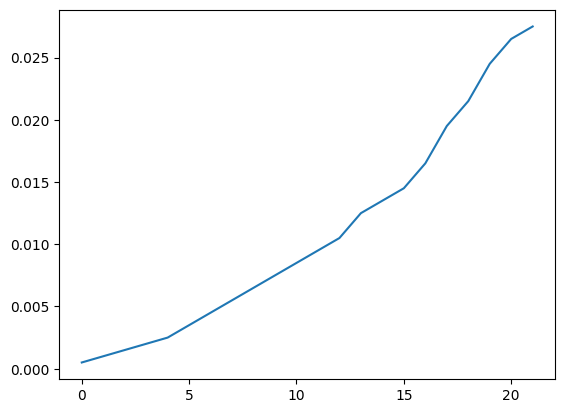

In [15]:
plt.plot(price_levels)

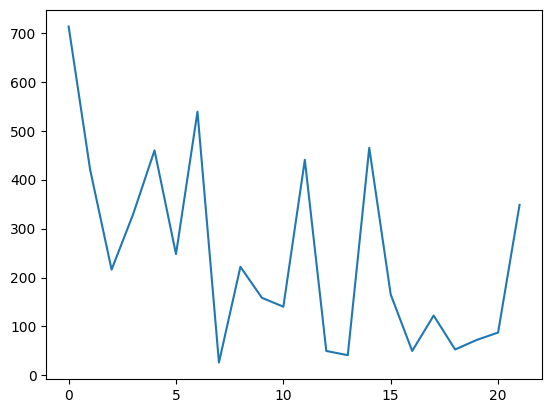

In [16]:
plt.plot(lambdas_adj)

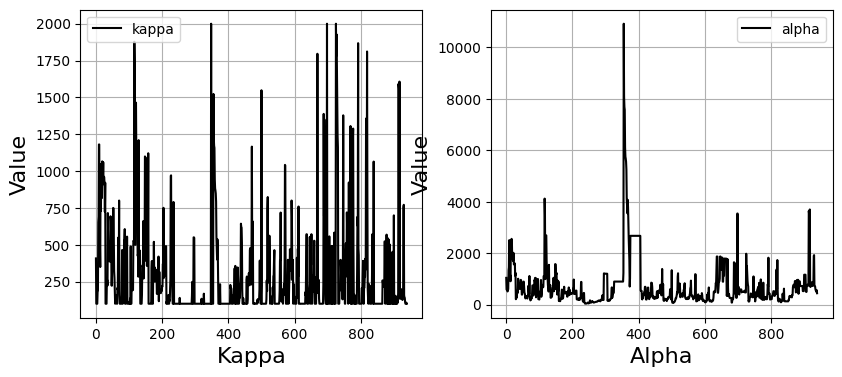

In [17]:
f = plt.figure(figsize=(15, 4))
f.add_subplot(1, 3, 1)
plt.plot(kappas, color='black', label='kappa')
plt.xlabel('Kappa', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.grid(True)
plt.legend()

f.add_subplot(1, 3, 2)
plt.plot(alphas, color='black', label='alpha')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.grid(True)
plt.legend()

In [18]:
def optimal_spread_stoikov(gamma, kappa):
    spread = (2/gamma)*math.log(1+ (gamma/kappa)) 
    return spread

def gueant_optimal_bids_asks(gamma, kappa, Q, alpha, sigma):
    coef = math.sqrt(((sigma**2 * gamma)/(2*kappa*alpha))*(1+(gamma/kappa))**(1+(kappa/gamma)))
    
    optimal_bid = (1/gamma)*math.log(1+(gamma/kappa)) + (1/2)*(2*Q +1)*coef
    
    optimal_ask = (1/gamma)*math.log(1+(gamma/kappa)) - (1/2)*(-2*Q - 1)*coef
    
    return optimal_bid + optimal_ask

In [19]:
for i in range(len(kappas)):
    if kappas[i] > 0:
        index_pos = i 
        break

In [20]:
index_pos

0

In [21]:
first_x_greeks = df_trades[30+index_pos:30+len(kappas)]['timestamp']
first_x_greeks.index = range(len(first_x_greeks))
first_x_greeks

0     2022-11-09 00:00:44.211967
1     2022-11-09 00:00:44.212038
2     2022-11-09 00:00:44.224976
3     2022-11-09 00:00:48.349906
4     2022-11-09 00:00:48.393527
                 ...            
935   2022-11-09 00:09:31.555617
936   2022-11-09 00:09:31.555617
937   2022-11-09 00:09:31.555617
938   2022-11-09 00:09:31.555617
939   2022-11-09 00:09:31.555617
Name: timestamp, Length: 940, dtype: datetime64[ns]

In [22]:
market_spread = []
level_5_spread = []
level_15_spread = []
level_20_spread = []

for i in range(len(first_x_greeks)):
    df_example = df_orderbook[df_orderbook['timestamp'] <= first_x_greeks[i]]
    idx = len(df_example) - 1
    
    spread_1 = df_example.loc[idx, 'asks[0].price'] - df_example.loc[idx, 'bids[0].price']
    market_spread.append(spread_1)
    
    spread_2 = df_example.loc[idx, 'asks[5].price'] - df_example.loc[idx, 'bids[5].price']
    level_5_spread.append(spread_2)
    
    spread_3 = df_example.loc[idx, 'asks[15].price'] - df_example.loc[idx, 'bids[15].price']
    level_15_spread.append(spread_3)

In [31]:
spreads_stoikov_1, spreads_stoikov_2, spreads_stoikov_3 = [], [], []
spreads_gueant_1, spreads_gueant_2, spreads_gueant_3 = [], [], []

gamma_1 = 0.0001
gamma_2 = 0.1
gamma_3 = 0.99

for i in range(len(first_x_greeks)):
    spread_stoikov_1 = optimal_spread_stoikov(gamma_1/market_spread[i], kappas[i+index_pos])
    spread_gueant_1 = gueant_optimal_bids_asks(gamma_1/market_spread[i], kappas[i+index_pos], 0, alphas[i], 0.0002)
    
    spreads_stoikov_1.append(spread_stoikov_1)
    spreads_gueant_1.append(spread_gueant_1)
    
    spread_stoikov_2 = optimal_spread_stoikov(gamma_2/market_spread[i], kappas[i+index_pos])
    spread_gueant_2 = gueant_optimal_bids_asks(gamma_2/market_spread[i], kappas[i+index_pos], 0, alphas[i], 0.0002)
    
    spreads_stoikov_2.append(spread_stoikov_2)
    spreads_gueant_2.append(spread_gueant_2)
    
    spread_stoikov_3 = optimal_spread_stoikov(gamma_3/market_spread[i], kappas[i+index_pos])
    spread_gueant_3 = gueant_optimal_bids_asks(gamma_3/market_spread[i], kappas[i+index_pos], 0, alphas[i], 0.0002)
    
    spreads_stoikov_3.append(spread_stoikov_3)
    spreads_gueant_3.append(spread_gueant_3)

In [32]:
spreads_stoikov_4, spreads_stoikov_5, spreads_stoikov_6 = [], [], []

gamma_1 = 0.001
gamma_2 = 0.1
gamma_3 = 0.99

for i in range(len(first_x_greeks) - 7):
    spread_stoikov_4 = optimal_spread_stoikov(gamma_1, kappas[i+index_pos])
    spreads_stoikov_4.append(spread_stoikov_4)
    
    spread_stoikov_5 = optimal_spread_stoikov(gamma_2, kappas[i+index_pos])
    spreads_stoikov_5.append(spread_stoikov_5)
    
    spread_stoikov_6 = optimal_spread_stoikov(gamma_3, kappas[i+index_pos])
    spreads_stoikov_6.append(spread_stoikov_6)

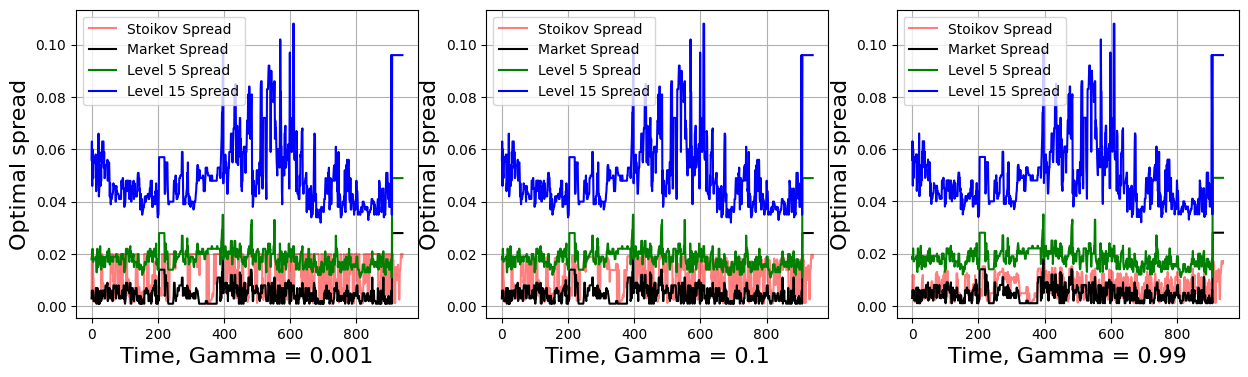

In [33]:
f = plt.figure(figsize=(15, 4))
f.add_subplot(1, 3, 1)
plt.plot(np.arange(0,len(spreads_stoikov_1),1), spreads_stoikov_1, color='red', label= 'Stoikov Spread', alpha = 0.5  )
#plt.plot(np.arange(0,len(spreads_stoikov_4),1), spreads_stoikov_4, color='blue', label= 'Stoikov Spread nd', alpha = 0.5  )
plt.plot(np.arange(0,len(market_spread),1), market_spread, color ='black', label= 'Market Spread' )
plt.plot(np.arange(0,len(level_5_spread),1), level_5_spread, color ='green', label= 'Level 5 Spread')
plt.plot(np.arange(0,len(level_15_spread),1), level_15_spread, color ='blue', label= 'Level 15 Spread')
plt.xlabel('Time, Gamma = {}'.format(gamma_1), fontsize=16)
plt.ylabel('Optimal spread', fontsize=16)
plt.grid(True)
plt.legend()

f.add_subplot(1, 3, 2)
plt.plot(np.arange(0,len(spreads_stoikov_2),1), spreads_stoikov_2, color='red', label= 'Stoikov Spread', alpha = 0.5 )
#plt.plot(np.arange(0,len(spreads_stoikov_5),1), spreads_stoikov_5, color='blue', label= 'Stoikov Spread nd', alpha = 0.5 )
plt.plot(np.arange(0,len(market_spread),1), market_spread, color ='black', label= 'Market Spread' )
plt.plot(np.arange(0,len(level_5_spread),1), level_5_spread, color ='green', label= 'Level 5 Spread')
plt.plot(np.arange(0,len(level_15_spread),1), level_15_spread, color ='blue', label= 'Level 15 Spread')
plt.xlabel('Time, Gamma = {}'.format(gamma_2), fontsize=16)
plt.ylabel('Optimal spread', fontsize=16)
plt.grid(True)
plt.legend()

f.add_subplot(1, 3, 3)
plt.plot(np.arange(0,len(spreads_stoikov_3), 1), spreads_stoikov_3, color='red', label= 'Stoikov Spread', alpha = 0.5 )
#plt.plot(np.arange(0,len(spreads_stoikov_6), 1), spreads_stoikov_6, color='blue', label= 'Stoikov Spread nd', alpha = 0.5 )
plt.plot(np.arange(0,len(market_spread), 1), market_spread, color ='black', label= 'Market Spread')
plt.plot(np.arange(0,len(level_5_spread),1), level_5_spread, color ='green', label= 'Level 5 Spread')
plt.plot(np.arange(0,len(level_15_spread),1), level_15_spread, color ='blue', label= 'Level 15 Spread')
plt.xlabel('Time, Gamma = {}'.format(gamma_3), fontsize=16)
plt.ylabel('Optimal spread', fontsize=16)
plt.grid(True)
plt.legend()

plt.savefig(r"C:\Users\Temp_Student_001\Desktop\research\0.projects\Ariyan\Dataset Coinbase LINK")